In [1]:
import zipfile
import os

# Specify the path to the uploaded zip file
zip_file_path = '/content/archive.zip'

# Specify the directory where you want to extract the contents
extract_path = '/content/archive/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [44]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [45]:
file_path = '../content/archive/PlantVillage'

In [46]:
name_class = os.listdir(file_path)
name_class

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Pepper__bell___healthy',
 'Potato___healthy',
 'Pepper__bell___Bacterial_spot',
 'Potato___Late_blight',
 'Tomato__Target_Spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Leaf_Mold',
 'Potato___Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot']

In [47]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [48]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,../content/archive/PlantVillage/Tomato__Tomato...,Tomato__Tomato_YellowLeaf__Curl_Virus
1,../content/archive/PlantVillage/Pepper__bell__...,Pepper__bell___healthy
2,../content/archive/PlantVillage/Tomato__Tomato...,Tomato__Tomato_YellowLeaf__Curl_Virus
3,../content/archive/PlantVillage/Tomato_Spider_...,Tomato_Spider_mites_Two_spotted_spider_mite
4,../content/archive/PlantVillage/Pepper__bell__...,Pepper__bell___healthy


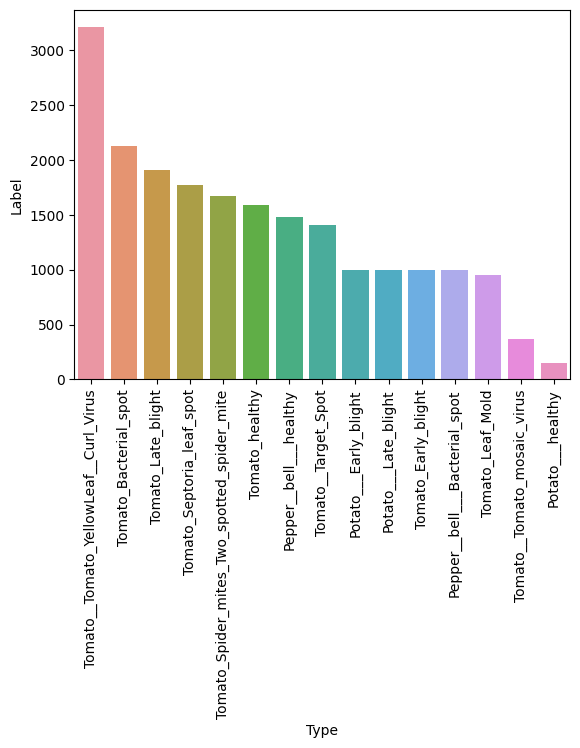

In [49]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [50]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

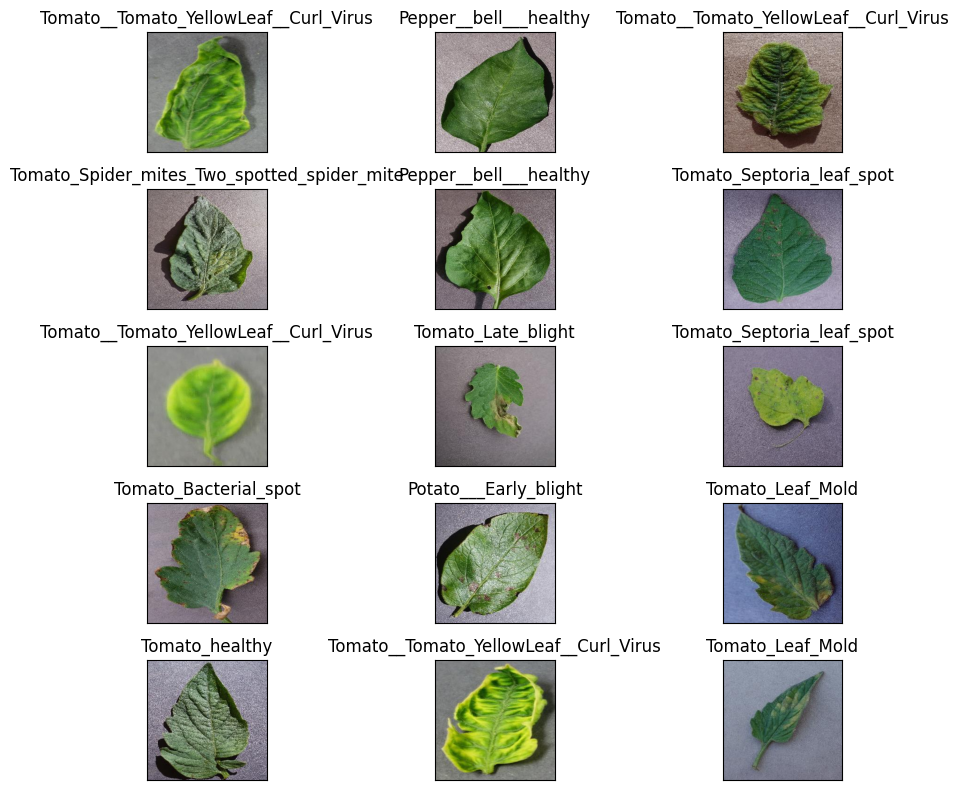

In [51]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
#train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
#test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images by up to 20 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom in/out by up to 20%
    horizontal_flip=True,     # Flip images horizontally
    rescale=1. / 255          # Normalize pixel values to the range [0, 1]
)

# Create an ImageDataGenerator for test data (only rescaling is typically applied)
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [53]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 15478 validated image filenames belonging to 15 classes.


In [54]:
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 15478 validated image filenames belonging to 15 classes.


In [55]:
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5160 validated image filenames belonging to 15 classes.


In [26]:
#pretrained_model = ResNet50(
    #input_shape=(100,100, 3),
    #include_top=False,
    #weights='imagenet',
    #pooling='avg'
#)

#pretrained_model.trainable = False

In [56]:
from keras.applications import DenseNet121
from keras.applications.densenet import preprocess_input

pretrained_model1 = DenseNet121(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model1.trainable = False


In [57]:
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

pretrained_model2 = InceptionV3(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model2.trainable = False


In [34]:
!pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [58]:
from efficientnet.keras import EfficientNetB0
from efficientnet.keras import preprocess_input as efficientnet_preprocess_input

pretrained_model3 = EfficientNetB0(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model3.trainable = False


In [59]:
inputs = pretrained_model1.input

x = Dense(128, activation='relu')(pretrained_model1.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(15, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [60]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [61]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [62]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=5,
    callbacks=my_callbacks
)

Epoch 1/5
484/484 [==============================] - 993s 2s/step - loss: 1.0201 - accuracy: 0.6660 - val_loss: 0.6423 - val_accuracy: 0.7867
Epoch 2/5
484/484 [==============================] - 897s 2s/step - loss: 0.6351 - accuracy: 0.7866 - val_loss: 0.6267 - val_accuracy: 0.7897
Epoch 3/5
484/484 [==============================] - 877s 2s/step - loss: 0.5442 - accuracy: 0.8153 - val_loss: 0.5386 - val_accuracy: 0.8150
Epoch 4/5
484/484 [==============================] - 882s 2s/step - loss: 0.5078 - accuracy: 0.8254 - val_loss: 0.5128 - val_accuracy: 0.8199
Epoch 5/5
484/484 [==============================] - 876s 2s/step - loss: 0.4671 - accuracy: 0.8424 - val_loss: 0.4458 - val_accuracy: 0.8462


In [1]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy for DenseNet121")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss for DenseNet121")
plt.show()

NameError: ignored

In [64]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.46753
Test Accuracy: 83.57%


In [65]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

162/162 [==============================] - 150s 913ms/step


In [66]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.65      0.99      0.78       228
                     Pepper__bell___healthy       0.98      0.81      0.89       372
                      Potato___Early_blight       0.83      0.98      0.90       218
                       Potato___Late_blight       0.90      0.73      0.80       240
                           Potato___healthy       0.87      0.87      0.87        30
                      Tomato_Bacterial_spot       0.91      0.87      0.89       554
                        Tomato_Early_blight       0.67      0.64      0.65       250
                         Tomato_Late_blight       0.90      0.81      0.86       488
                           Tomato_Leaf_Mold       0.83      0.73      0.78       250
                  Tomato_Septoria_leaf_spot       0.70      0.88      0.78       464
Tomato_Spider_mites_Two_spotted_spider_mite       0.89      0.66

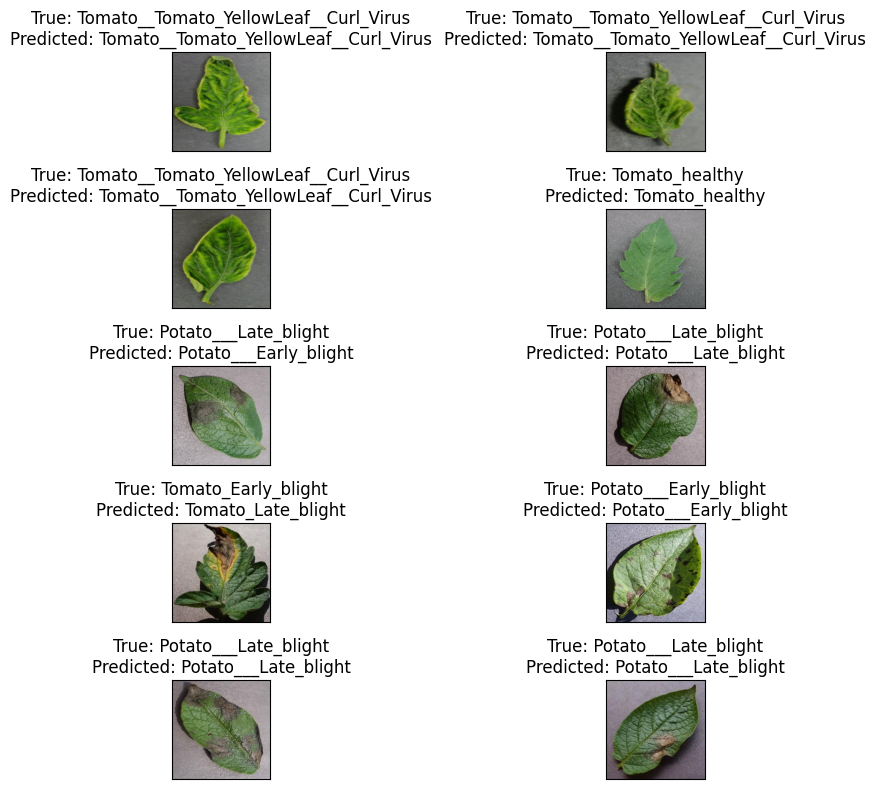

In [67]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images by up to 20 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom in/out by up to 20%
    horizontal_flip=True,     # Flip images horizontally
    rescale=1. / 255          # Normalize pixel values to the range [0, 1]
)

# Create an ImageDataGenerator for test data (only rescaling is typically applied)
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [42]:
os.listdir('../content/archive/PlantVillage')

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Pepper__bell___healthy',
 'Potato___healthy',
 'Pepper__bell___Bacterial_spot',
 'Potato___Late_blight',
 'Tomato__Target_Spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Leaf_Mold',
 'Potato___Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot']

In [43]:
len(os.listdir('../content/archive/PlantVillage'))

15

In [44]:
list_diseases = os.listdir('../content/archive/PlantVillage')

In [45]:
DataFrame = []
for disease in list_diseases:
    dies_name_count = {}
    count_disease = len(os.listdir(f'../content/archive/PlantVillage/{disease}'))
    dies_name_count['disease'] = disease
    dies_name_count['count_images'] = count_disease
    DataFrame.append(dies_name_count)

In [48]:
import pandas as pd
DataFrameResult = pd.DataFrame(DataFrame)
DataFrameResult

,disease,count_images
0,Tomato_Early_blight,1000
1,Tomato_Late_blight,1909
2,Pepper__bell___healthy,1478
3,Potato___healthy,152
4,Pepper__bell___Bacterial_spot,997
5,Potato___Late_blight,1000
6,Tomato__Target_Spot,1404
7,Tomato_healthy,1591
8,Tomato_Spider_mites_Two_spotted_spider_mite,1676
9,Tomato__Tomato_mosaic_virus,373


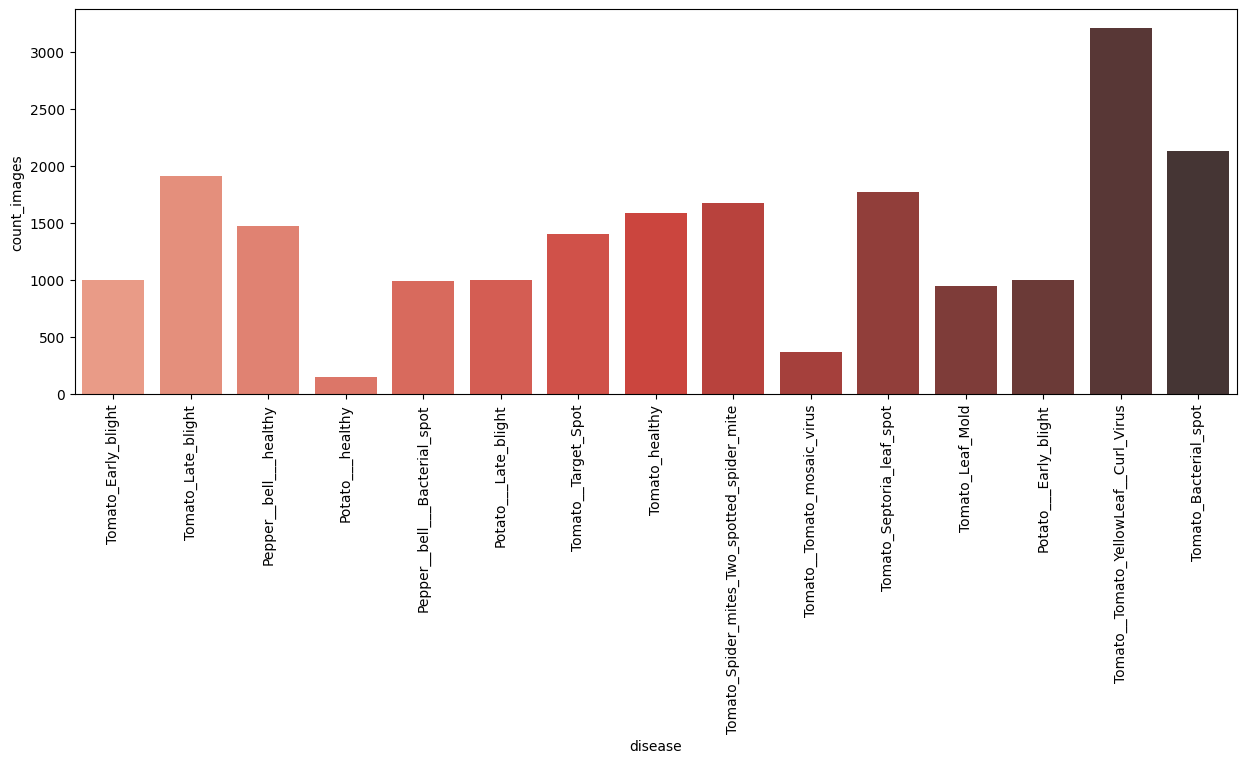

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,5))
sns.barplot(x='disease', y = 'count_images', data= results, palette='Reds_d')
plt.xticks(rotation=90)
plt.show()

In [31]:
# we have 3 categories
#tomato
# pepper_bell
# Potato

tomato_diseases, pepper_diseases, potato_diseases = [], [],[]
for disease in list_diseases:
    if 'Tomato' in disease:
        tomato_diseases.append(disease)
    if 'Pepper' in disease:
        pepper_diseases.append(disease)
    if 'Potato' in disease:
        potato_diseases.append(disease)

In [34]:
#tomato
total_t_count = 0
for t_d in tomato_diseases:
    t_disease_count = len(os.listdir(f'../content/archive/PlantVillage/{t_d}'))
    total_t_count += t_disease_count
# total tomato count
total_t_count

16012

In [35]:
# pepper_bell
total_p_count = 0
for t_p in pepper_diseases:
    p_disease_count = len(os.listdir(f'../content/archive/PlantVillage/{t_p}'))
    total_p_count += p_disease_count
# total pepper Count
total_p_count


2475

In [36]:
# Potato
total_po_count = 0
for t_po in potato_diseases:
    po_disease_count = len(os.listdir(f'../content/archive/PlantVillage/{t_po}'))
    total_po_count += po_disease_count
# total potato Count
total_po_count

2152

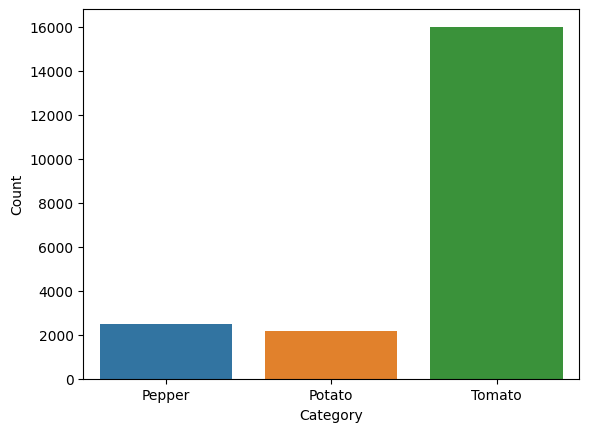

In [37]:
ind_count = pd.DataFrame([{'Category':'Pepper','Count':total_p_count},
{'Category':'Potato','Count':total_po_count},
{'Category':'Tomato','Count':total_t_count}])
sns.barplot(x='Category', y = 'Count', data=ind_count)
plt.show()